# Import Stuff

In [49]:
from validation_protocol import *
from loopsage.utils import get_coordinates_cif
import numpy as np
import hicstraw
import os
import seaborn as sns

In [50]:
hic_ref_file = "/home/skorsak/Data/4DNucleome/4DNFIC3JD6O2/4DNFIC3JD6O2.hic"
hic = hicstraw.HiCFile(hic_ref_file)
matrix_object = hic.getMatrixZoomData('1', '1', "observed", "NONE", "BP", 2000)
hic_matrix = matrix_object.getRecordsAsMatrix(178421513,179491193,178421513,179491193)
hic_exp_matrix = (hic_matrix - np.min(hic_matrix))/(np.max(hic_matrix) - np.min(hic_matrix))

chiapet_ref_file = "/home/skorsak/Data/method_paper_data/ENCSR184YZV_CTCF_ChIAPET/ENCFF379AWZ.hic"
chiapet = hicstraw.HiCFile(chiapet_ref_file)
matrix_object = chiapet.getMatrixZoomData('1', '1', "observed", "NONE", "BP", 1000)
chiapet_matrix = matrix_object.getRecordsAsMatrix(178421513,179491193,178421513,179491193)
chiapet_exp_matrix = (chiapet_matrix - np.min(chiapet_matrix))/(np.max(chiapet_matrix) - np.min(chiapet_matrix))

In [51]:
path_chiapet = '/home/skorsak/Data/hackathon/results/distance_matrices/chia_pet'
path_HiC = '/home/skorsak/Data/hackathon/results/distance_matrices/hic'
files = ['phic_dist_mat_215.npy',
         'loopsage_dist_mat_215.npy',
         'michrom_dist_mat_215.npy',
         'multiem_dist_mat_215.npy',
         'dimes_dist_mat_215.npy']
names = ['PHi-C2','LoopSage','MiChroM','MultiMM','DIMES']

## Comparison between models

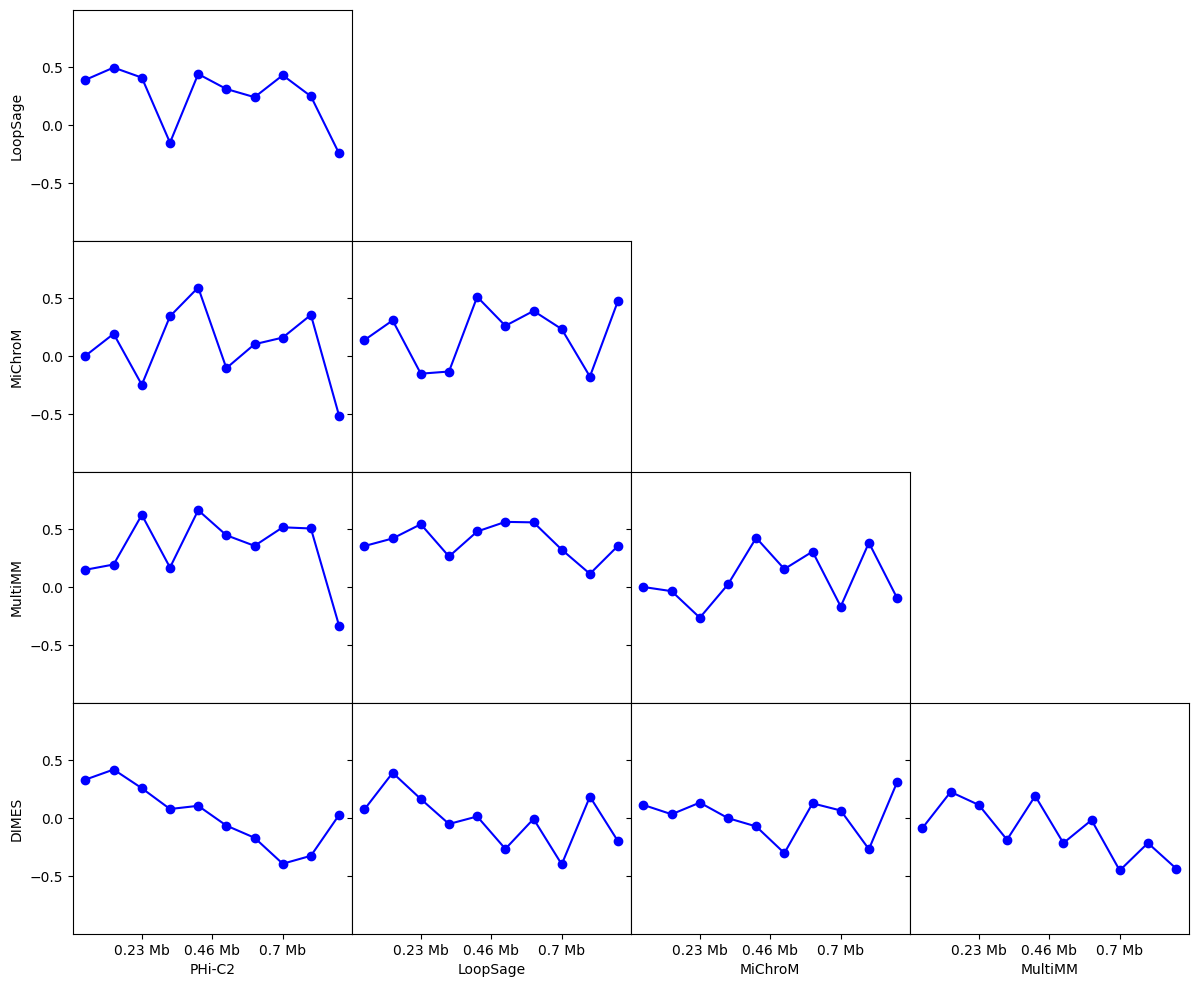

In [7]:
# Create a figure with a 5x5 grid layout
fig = plt.figure(figsize=(18, 15))
gs = fig.add_gridspec(5, 5, hspace=0, wspace=0)

# Create subplots as a 2D array
axes = gs.subplots(sharex='col', sharey='row')

for i, file1 in enumerate(files):
    for j, file2 in enumerate(files):
        heat1 = np.load(path_chiapet+'/'+file1)
        heat2 = np.load(path_chiapet+'/'+file2)
        genomic_distances, pearson_correlations, spearman_corrs = compute_dscc(heat1, heat2, bin_size=20)
        axes[i,j].plot(genomic_distances, spearman_corrs, label="Spearman", marker="o", color='blue')
        axes[i,j].set_ylim((-1,1))
        axes[i,j].set_yticks([-0.5, 0, 0.5])
        axes[i,j].set_xticks([50, 100, 150])
        axes[i,j].set_xticklabels(['0.23 Mb', '0.46 Mb', '0.7 Mb'])
        if i==4:
            axes[i,j].set_xlabel(names[j])
        if j==0:
            axes[i,j].set_ylabel(names[i])
        
for i, file1 in enumerate(files):
    for j, file2 in enumerate(files):
        if j>=i: axes[i,j].remove()

for ax in fig.get_axes():
    ax.label_outer()

# Show plot
plt.show()

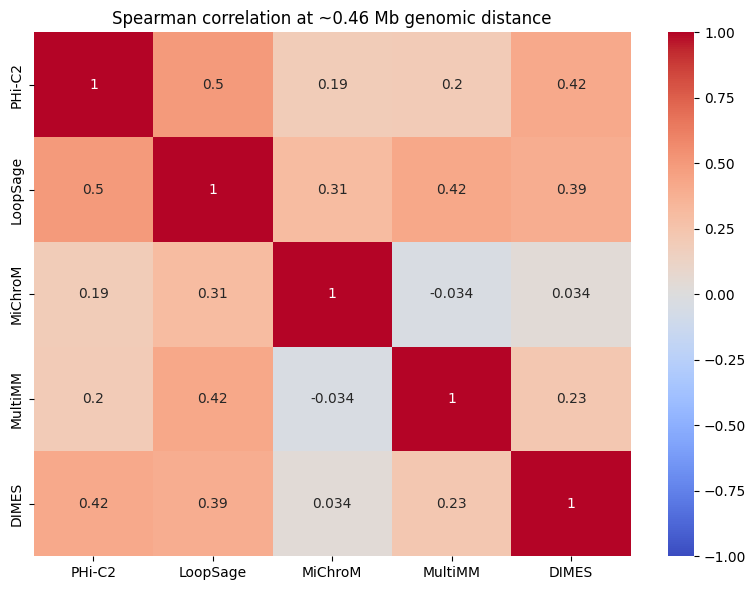

In [8]:
distance_idx = 1  # corresponds to ~0.46 Mb if it's index 1 out of [0.23, 0.46, 0.7]
corr_matrix = np.zeros((5, 5))

for i, file1 in enumerate(files):
    for j, file2 in enumerate(files):
        h1 = np.load(path_chiapet+'/'+file1)
        h2 = np.load(path_chiapet+'/'+file2)
        _, _, spearman_corrs = compute_dscc(h1, h2, bin_size=20)
        corr_matrix[i, j] = spearman_corrs[distance_idx]

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, xticklabels=names, yticklabels=names, annot=True, vmin=-1, vmax=1, cmap='coolwarm')
plt.title("Spearman correlation at ~0.46 Mb genomic distance")
plt.tight_layout()
plt.show()

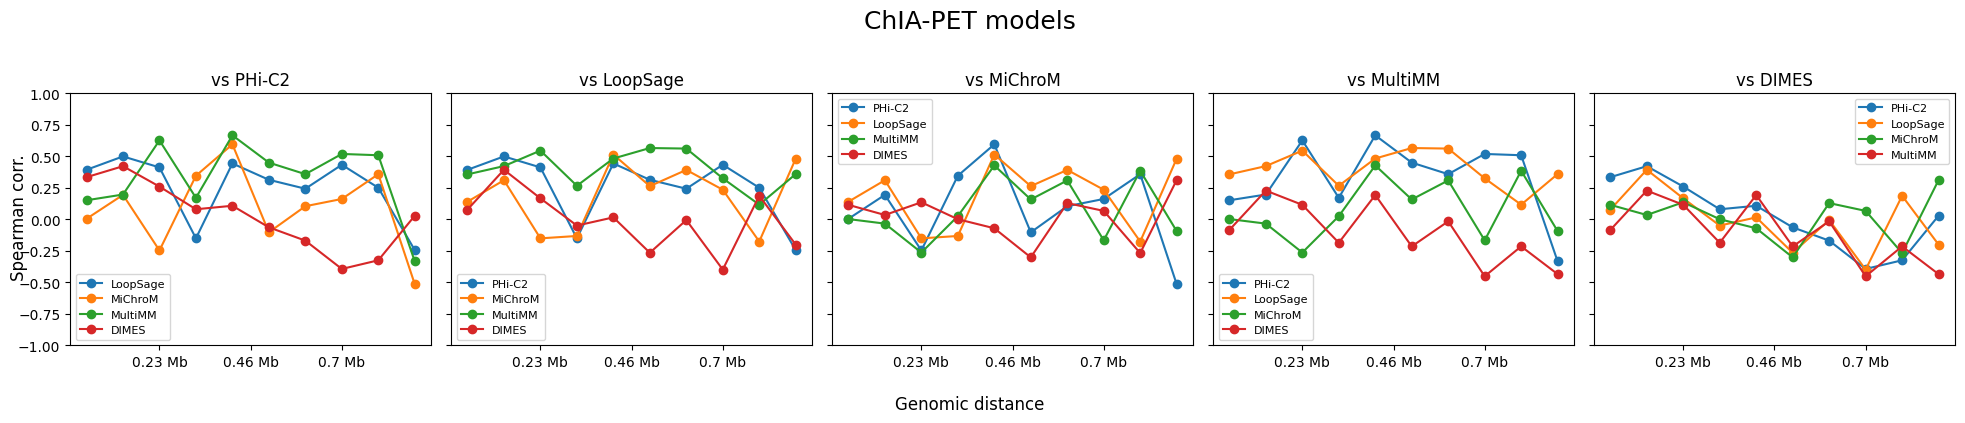

In [9]:
fig, axs = plt.subplots(1, 5, figsize=(20, 4), sharey=True)

for idx, ref_file in enumerate(files):
    for j, comp_file in enumerate(files):
        if idx == j:
            continue
        h1 = np.load(path_chiapet + '/' + ref_file)
        h2 = np.load(path_chiapet + '/' + comp_file)
        dists, _, spearman = compute_dscc(h1, h2, bin_size=20)
        axs[idx].plot(dists, spearman, label=names[j], marker='o')
    axs[idx].set_title(f"vs {names[idx]}")
    axs[idx].set_ylim(-1, 1)
    axs[idx].set_xticks([50, 100, 150])
    axs[idx].set_xticklabels(['0.23 Mb', '0.46 Mb', '0.7 Mb'])
    axs[idx].legend(fontsize=8)

fig.supylabel("Spearman corr.")
fig.supxlabel("Genomic distance")
fig.suptitle("ChIA-PET models", fontsize=18, y=1.02)
plt.tight_layout()
plt.show()

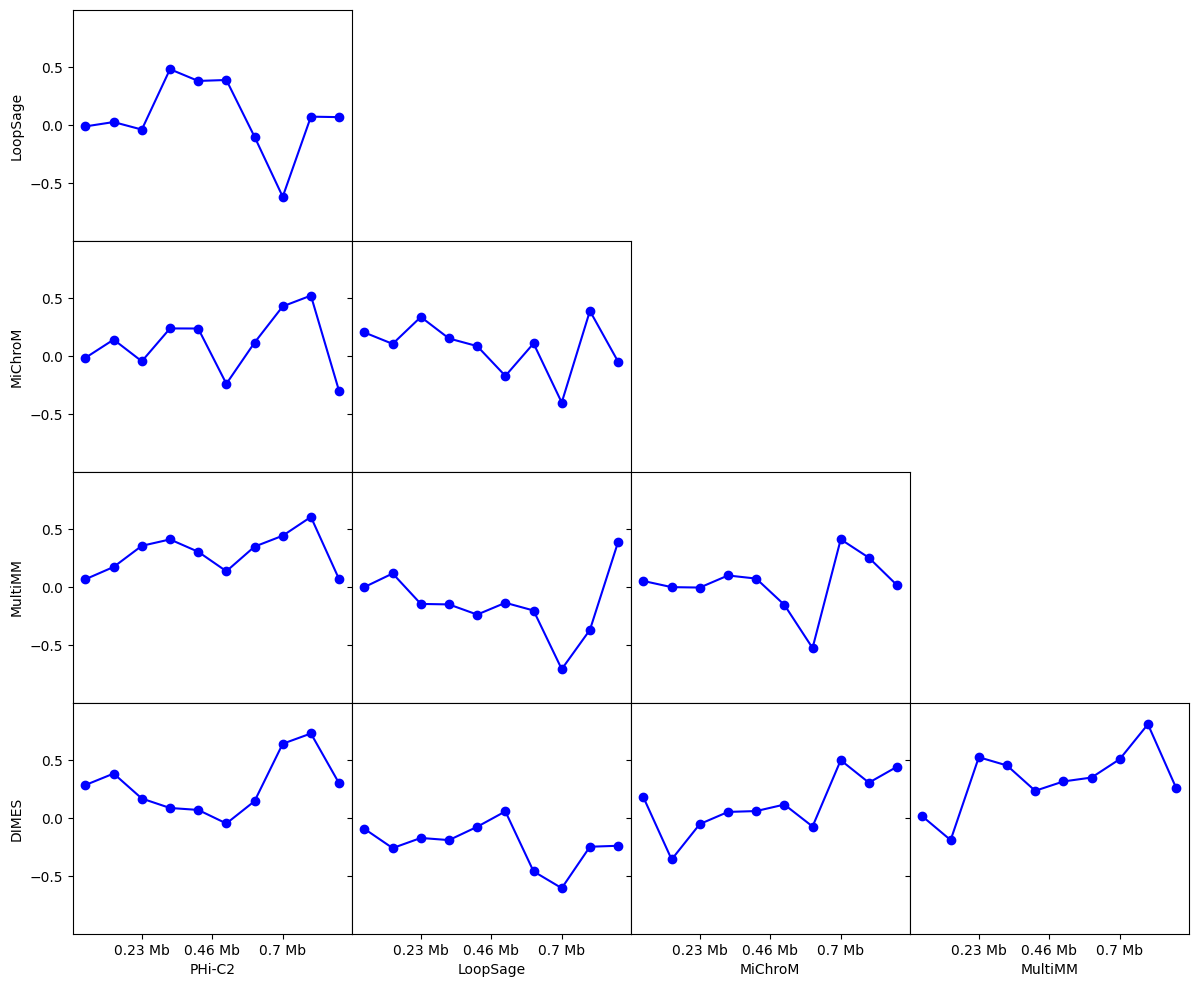

In [10]:
# Create a figure with a 5x5 grid layout
fig = plt.figure(figsize=(18, 15))
gs = fig.add_gridspec(5, 5, hspace=0, wspace=0)

# Create subplots as a 2D array
axes = gs.subplots(sharex='col', sharey='row')

for i, file1 in enumerate(files):
    for j, file2 in enumerate(files):
        heat1 = np.load(path_HiC+'/'+file1)
        heat2 = np.load(path_HiC+'/'+file2)
        genomic_distances, pearson_correlations, spearman_corrs = compute_dscc(heat1, heat2, bin_size=20)
        axes[i,j].plot(genomic_distances, spearman_corrs, label="Spearman", marker="o", color='blue')
        axes[i,j].set_ylim((-1,1))
        axes[i,j].set_yticks([-0.5, 0, 0.5])
        axes[i,j].set_xticks([50, 100, 150])
        axes[i,j].set_xticklabels(['0.23 Mb', '0.46 Mb', '0.7 Mb'])
        if i==4:
            axes[i,j].set_xlabel(names[j])
        if j==0:
            axes[i,j].set_ylabel(names[i])
            
for i, file1 in enumerate(files):
    for j, file2 in enumerate(files):
        if j>=i: axes[i,j].remove()

for ax in fig.get_axes():
    ax.label_outer()

# Show plot
plt.show()

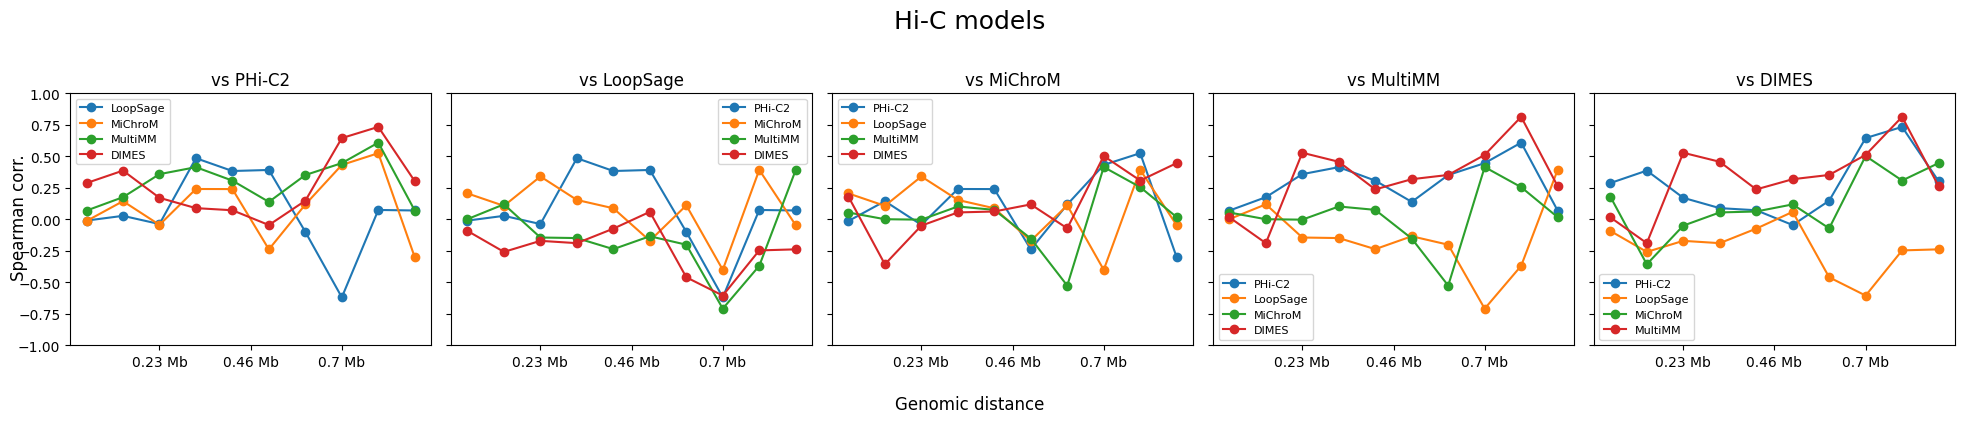

In [11]:
fig, axs = plt.subplots(1, 5, figsize=(20, 4), sharey=True)

for idx, ref_file in enumerate(files):
    for j, comp_file in enumerate(files):
        if idx == j:
            continue
        h1 = np.load(path_HiC + '/' + ref_file)
        h2 = np.load(path_HiC + '/' + comp_file)
        dists, _, spearman = compute_dscc(h1, h2, bin_size=20)
        axs[idx].plot(dists, spearman, label=names[j], marker='o')
    axs[idx].set_title(f"vs {names[idx]}")
    axs[idx].set_ylim(-1, 1)
    axs[idx].set_xticks([50, 100, 150])
    axs[idx].set_xticklabels(['0.23 Mb', '0.46 Mb', '0.7 Mb'])
    axs[idx].legend(fontsize=8)

fig.supylabel("Spearman corr.")
fig.supxlabel("Genomic distance")
fig.suptitle("Hi-C models", fontsize=18, y=1.02)
plt.tight_layout()
plt.show()

## Comparison with reference experimental data

In [54]:
def smooth_matrix(matrix, sigma=1.0):
    """
    Apply Gaussian smoothing to the input matrix.
    
    Parameters:
    - matrix: 2D numpy array to be smoothed.
    - sigma: Standard deviation for Gaussian kernel (controls smoothing extent).
    
    Returns:
    - Smoothed matrix.
    """
    return gaussian_filter(matrix, sigma=sigma)

def normalize_matrix(matrix, method="zscore"):
    """
    Normalize the input matrix using the specified method.
    Methods: 'zscore', 'minmax', 'log'
    """
    if method == "zscore":
        mean = np.mean(matrix)
        std = np.std(matrix)
        return (matrix - mean) / std
    elif method == "minmax":
        min_val = np.min(matrix)
        max_val = np.max(matrix)
        return (matrix - min_val) / (max_val - min_val)
    elif method == "log":
        return np.log1p(matrix)
    else:
        return matrix

def resize_matrix(larger, target_shape):
    """Resize the larger matrix to the target shape using averaging."""
    large_rows, large_cols = larger.shape
    target_rows, target_cols = target_shape

    row_scale = large_rows / target_rows
    col_scale = large_cols / target_cols

    # Create an output matrix
    resized = np.zeros((target_rows, target_cols))

    for i in range(target_rows):
        for j in range(target_cols):
            # Determine the bounds of the block in the original matrix
            row_start = int(i * row_scale)
            row_end = int((i + 1) * row_scale)
            col_start = int(j * col_scale)
            col_end = int((j + 1) * col_scale)

            # Average over the block
            resized[i, j] = np.mean(larger[row_start:row_end, col_start:col_end])

    return resized

def compute_metrics(matrix1, matrix2):
    """Compute various metrics between two matrices."""
    # Flatten the matrices
    m1_flat = matrix1.flatten()
    m2_flat = matrix2.flatten()
    # m1_flat = np.average(matrix1,axis=0)
    # m2_flat = np.average(matrix2,axis=0)

    # Pearson correlation
    pearson_corr, _ = pearsonr(m1_flat, m2_flat)

    # Spearman correlation
    spearman_corr, _ = spearmanr(m1_flat, m2_flat)

    # Kendall-Tau correlation
    kendall_corr, _ = kendalltau(m1_flat, m2_flat)

    # Mean Squared Error
    mse = np.mean((m1_flat - m2_flat) ** 2)

    return {
        "Pearson Correlation": pearson_corr,
        "Spearman Correlation": spearman_corr,
        "Kendall-Tau Correlation": kendall_corr,
        "Mean Squared Error": mse,
    }

def compare_heatmaps(hic_exp, hic_sim, sigma=1.0, normalization_method="minmax"):
    """Main function to compare Hi-C experimental and simulated heatmaps."""
    # Apply Gaussian smoothing to the experimental heatmap
    smoothed_exp = hic_exp
    # smoothed_exp = smooth_matrix(hic_exp, sigma=sigma)

    # Apply averaging to the bigger matrix to match th dimension of smaller
    if hic_exp.shape == hic_sim.shape:
        resized_exp, resized_sim = smoothed_exp, hic_sim
    elif hic_exp.size > hic_sim.size:
        resized_exp = resize_matrix(smoothed_exp, hic_sim.shape)
        resized_sim = hic_sim
    else:
        resized_sim = resize_matrix(hic_sim, smoothed_exp.shape)
        resized_exp = hic_exp

     # Normalize the matrices
    norm_exp = normalize_matrix(resized_exp, method=normalization_method)
    norm_sim = normalize_matrix(resized_sim, method=normalization_method)

    # Estimate correlation
    metrics = compute_metrics(norm_exp, norm_sim)
    return resized_exp, resized_sim, metrics

In [55]:
from scipy.stats import entropy
from scipy.special import rel_entr

def kl_divergence(p, q):
    """Compute KL divergence between two 2D matrices interpreted as flattened probability distributions."""
    p = p.flatten()
    q = q.flatten()
    p = p / np.sum(p)
    q = q / np.sum(q)

    # Avoid div by zero
    mask = (p > 0) & (q > 0)
    return np.sum(rel_entr(p[mask], q[mask]))

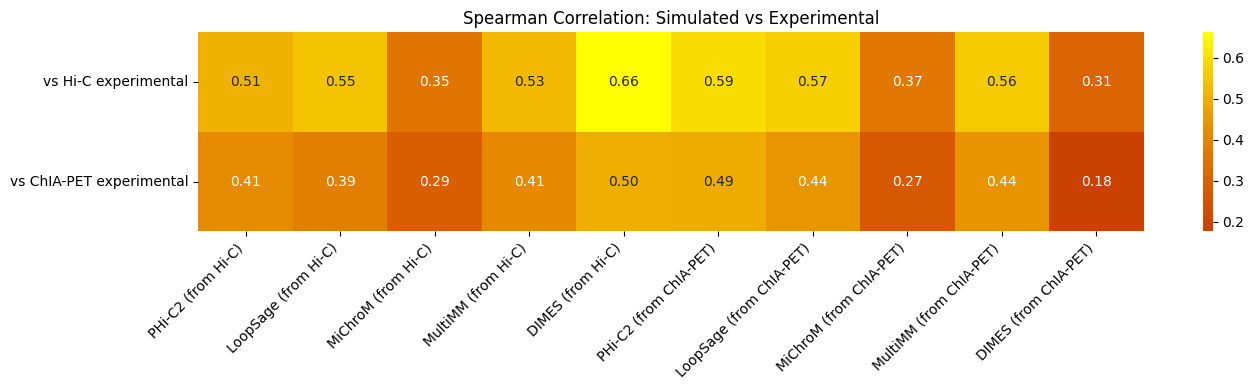

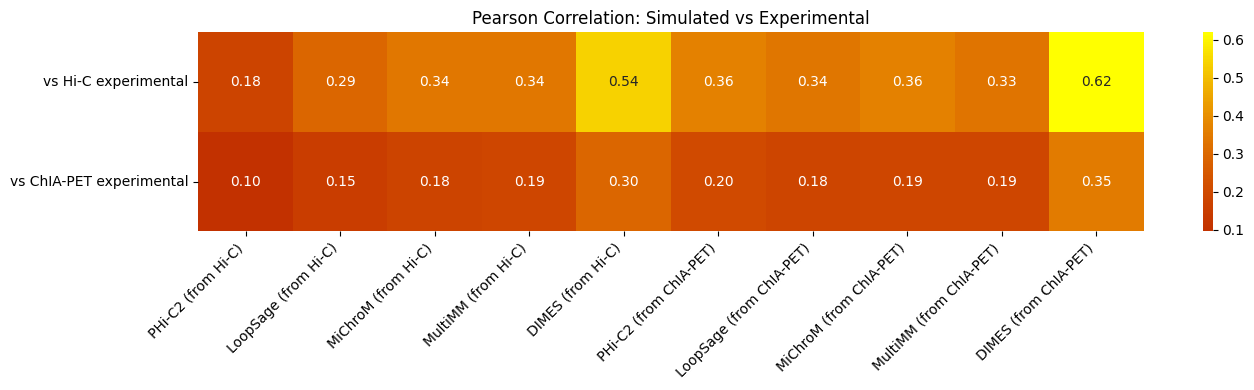

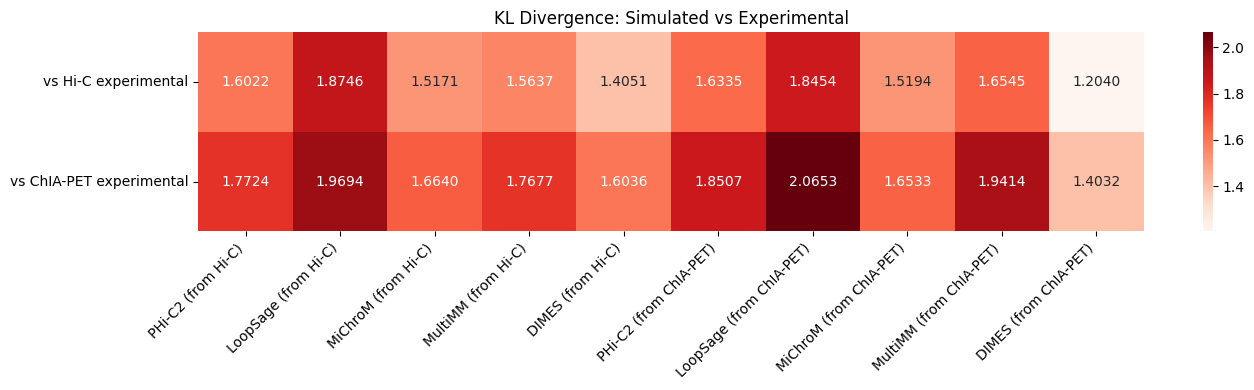

In [58]:
# === Init ===
n = len(files)
labels = [f"{name} (from Hi-C)" for name in names] + [f"{name} (from ChIA-PET)" for name in names]
row_labels = ["vs Hi-C experimental", "vs ChIA-PET experimental"]

# Result matrices
spearman_matrix = np.zeros((2, 2 * n))
pearson_matrix = np.zeros_like(spearman_matrix)
kl_matrix = np.zeros_like(spearman_matrix)

# === Loop ===
for i, (file, name) in enumerate(zip(files, names)):
    hic_sim = np.load(f"{path_HiC}/{file}")
    chia_sim = np.load(f"{path_chiapet}/{file}")

    # === From Hi-C simulations ===
    resized_exp, resized_sim, metrics = compare_heatmaps(hic_exp_matrix, hic_sim)
    spearman_matrix[0, i] = abs(metrics["Spearman Correlation"])
    pearson_matrix[0, i] = abs(metrics["Pearson Correlation"])
    kl_matrix[0, i] = kl_divergence(resized_exp, resized_sim)

    resized_exp, resized_sim, metrics = compare_heatmaps(chiapet_exp_matrix, hic_sim)
    spearman_matrix[1, i] = abs(metrics["Spearman Correlation"])
    pearson_matrix[1, i] = abs(metrics["Pearson Correlation"])
    kl_matrix[1, i] = kl_divergence(resized_exp, resized_sim)

    # === From ChIA-PET simulations ===
    resized_exp, resized_sim, metrics = compare_heatmaps(hic_exp_matrix, chia_sim)
    spearman_matrix[0, n + i] = abs(metrics["Spearman Correlation"])
    pearson_matrix[0, n + i] = abs(metrics["Pearson Correlation"])
    kl_matrix[0, n + i] = kl_divergence(resized_exp, resized_sim)

    resized_exp, resized_sim, metrics = compare_heatmaps(chiapet_exp_matrix, chia_sim)
    spearman_matrix[1, n + i] = abs(metrics["Spearman Correlation"])
    pearson_matrix[1, n + i] = abs(metrics["Pearson Correlation"])
    kl_matrix[1, n + i] = kl_divergence(resized_exp, resized_sim)

# === Plotting helper ===
def plot_heatmap(data, title, cmap="gnuplot", fmt=".2f", center=None):
    plt.figure(figsize=(14, 4))
    sns.heatmap(data, annot=True, fmt=fmt, xticklabels=labels, yticklabels=row_labels,
                cmap=cmap, center=center)
    plt.xticks(rotation=45, ha="right")
    plt.title(title)
    plt.tight_layout()
    plt.show()

# === Plot all ===
plot_heatmap(spearman_matrix, "Spearman Correlation: Simulated vs Experimental", center=0)
plot_heatmap(pearson_matrix, "Pearson Correlation: Simulated vs Experimental", center=0)
plot_heatmap(kl_matrix, "KL Divergence: Simulated vs Experimental", cmap="Reds", fmt=".4f", center=None)

Stratified dscc: 100%|█████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 13.94it/s]


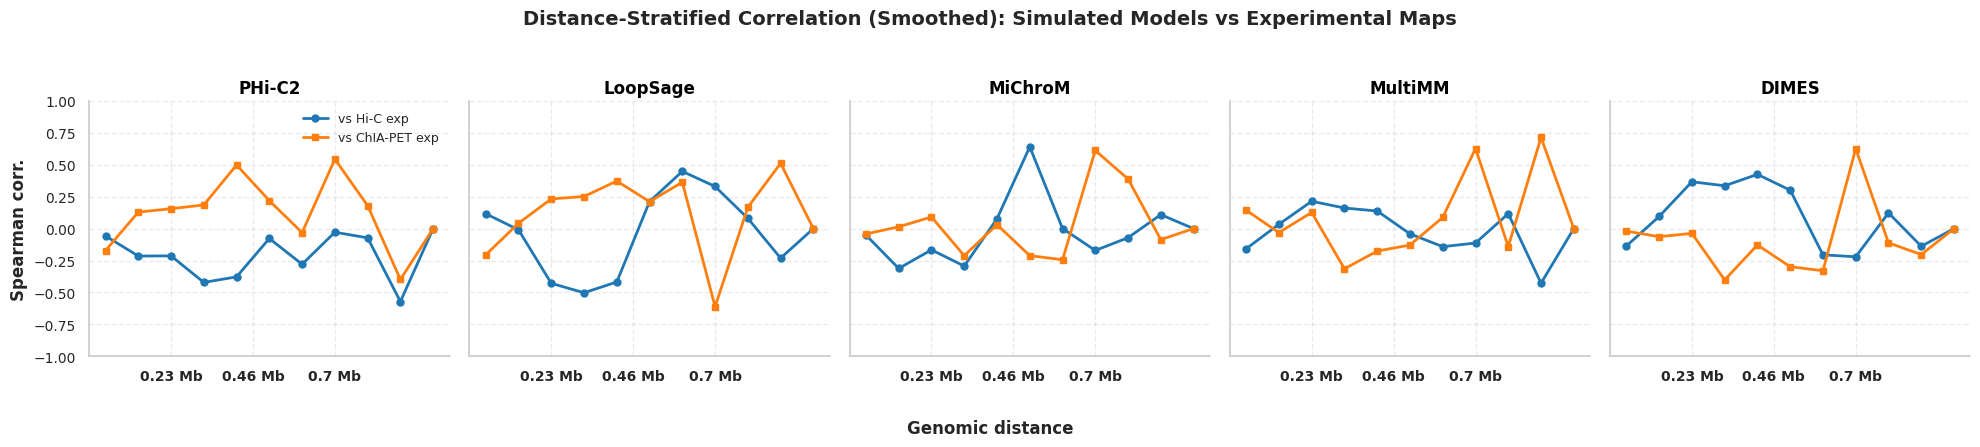

In [64]:
# -- Smoothing function --
def smooth_matrix(matrix, sigma=1.0):
    return gaussian_filter(matrix, sigma=sigma)

sns.set(style="whitegrid", context="notebook", font_scale=1.1)

colors = {
    "Hi-C exp": "#1f77b4",      # blue
    "ChIA-PET exp": "#ff7f0e"   # orange
}
markers = {
    "Hi-C exp": "o",
    "ChIA-PET exp": "s"
}

fig, axs = plt.subplots(1, 5, figsize=(20, 4), sharey=True)

for idx, (file, model_name) in enumerate(tqdm(zip(files, names), total=len(files), desc="Stratified dscc")):
    h_sim_raw = np.load(f"{path_HiC}/{file}")
    h_sim = smooth_matrix(h_sim_raw, sigma=1.0)

    # Smooth experimental matrices
    hic_exp_smoothed = smooth_matrix(hic_exp_matrix, sigma=1.0)
    chia_exp_smoothed = smooth_matrix(chiapet_exp_matrix, sigma=1.0)

    # --- Compute vs Hi-C experimental ---
    d_hic, _, s_hic = compute_dscc(h_sim, hic_exp_smoothed, bin_size=20)
    s_hic = np.nan_to_num(np.array(s_hic), nan=0.0)

    # --- Compute vs ChIA-PET experimental ---
    d_chia, _, s_chia = compute_dscc(h_sim, chia_exp_smoothed, bin_size=20)
    s_chia = np.nan_to_num(np.array(s_chia), nan=0.0)

    # --- Plot both curves ---
    axs[idx].plot(d_hic, s_hic, label='vs Hi-C exp', color=colors["Hi-C exp"],
                  marker=markers["Hi-C exp"], markersize=5, linewidth=2)

    axs[idx].plot(d_chia, s_chia, label='vs ChIA-PET exp', color=colors["ChIA-PET exp"],
                  marker=markers["ChIA-PET exp"], markersize=5, linewidth=2)

    axs[idx].set_title(model_name, fontsize=12, fontweight='bold', color='black')
    axs[idx].set_ylim(-1, 1)
    axs[idx].set_xticks([50, 100, 150])
    axs[idx].set_xticklabels(['0.23 Mb', '0.46 Mb', '0.7 Mb'], fontsize=10, weight='bold')
    axs[idx].tick_params(axis='y', labelsize=10)
    axs[idx].spines['top'].set_visible(False)
    axs[idx].spines['right'].set_visible(False)
    axs[idx].grid(True, which='major', linestyle='--', alpha=0.4)

    if idx == 0:
        axs[idx].set_ylabel("Spearman corr.", fontsize=12, weight='bold')

# --- Legend ---
handles, labels_ = axs[0].get_legend_handles_labels()
axs[0].legend(handles, labels_, loc='upper right', fontsize=9, frameon=False)

# --- Labels ---
fig.supxlabel("Genomic distance", fontsize=12, weight='bold')
fig.suptitle("Distance-Stratified Correlation (Smoothed): Simulated Models vs Experimental Maps", 
             fontsize=14, weight='bold', y=1.08)

plt.tight_layout()
plt.subplots_adjust(top=0.85)
plt.show()